# TD11 noté du 15/04

In [5]:
from data_extraction import *
import numpy as np 

In [6]:
X[1234]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [7]:
Z[1234]

array([[0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 0, 0]])

In [8]:
Y[1234]

1

In [9]:
print(X[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


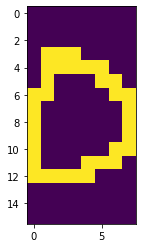

In [10]:
plt.imshow(Z[0])

In [11]:
print(Y[0])

14


In [12]:
X.shape

(52152, 128)

In [13]:
Y_list= Y.tolist()


In [14]:
Y_list.count(17)

2673

In [15]:
S = np.column_stack((X,Y))

In [16]:
def split_train_test(S, size = 0.1):
    S_learn = []
    S_test = []
    for s in S:
        if np.random.rand()< size:
            S_test.append(s)
        else:
            S_learn.append(s)
    return np.array(S_learn), np.array(S_test)

In [17]:
train_set,test_set =  split_train_test(S)

In [18]:
def One_hot_encoding(y):
    y_temp = np.zeros((y.shape[0],26))
    for i in range(y.shape[0]):
        y_temp[i, int(y[i])] =  1
        
    return y_temp

#Test: o est la première lettre dans le dataset, c'est la 15ème lettre de l'alphabet donc elle est bien placée 
print(One_hot_encoding(Y)[0])
print((One_hot_encoding(Y)).shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
(52152, 26)


In [19]:
def sigm(v):
    v2 = np.exp(-v)+1
    v2 = 1/v2
    return(v2)

In [110]:
# fonction pour compter le nbr d'erreur
def nbr_error(u,S):
    In = S[:,:-1]
    Out = S[:,-1]
    
    u = u.reshape(26,129)
    x = u[:,:-1]
    b = u[:,-1]
    
    vect = In.dot(x.T) + b
    vect = sigm(vect/100)
    
    
    y_prediction =  np.array(vect.argmax(axis=1))
    
    
    return (Out != y_prediction).sum()

#fonction de calcul de la loss
def loss(u,S):
    In = S[:,:-1]
    Out = S[:,-1]
    
    u = u.reshape(26,129)
    x = u[:,:-1]
    b = u[:,-1]
    
    vect = In.dot((x).T) + b
    vect = sigm(vect/100)
    y = One_hot_encoding(Out)
    y_temp =  (y * vect).sum(axis=1)
    
    loss = -np.log(y_temp).sum()
    return loss

In [21]:
print(X.shape)

(52152, 128)


In [22]:
def softmax(v):
    return(((np.exp(v).T)/(np.exp(v).sum(axis = 1))).T)

In [23]:
u = np.random.randn(3354)
print(loss(u,S))
print(nbr_error(u,S))

95288.28656981965
49564


In [169]:
grad = grad_desc_n(loss, test_set, 3354, 50, step = 0.5, x_0 = None)

u_solution = grad

print(loss(u_solution,S))
print(nbr_error(u_solution,S))

0 3411.542071455311
1 3209.529018530023
2 3031.143185940572
3 2872.695093887813
4 2731.092172186244
5 2603.7770171240227
6 2488.647054150066
7 2383.9749056454166
8 2288.3378120552643
9 2200.5585331534635
10 2119.6573478322753
11 2044.8136813004883
12 1975.3356716745045
13 1910.6360901355422
14 1850.2132651595125
15 1793.6359261785187
16 1740.5311036961957
17 1690.5744263319584
18 1643.4822803180743
19 1599.0054507216096
20 1556.9239237069444
21 1517.042610501202
22 1479.187816665673
23 1443.204301175672
24 1408.9528177416983
25 1376.3080447892548
26 1345.156838937869
27 1315.396747031797
28 1286.934738302625
29 1259.686115036327
30 1233.5735757134742
31 1208.526404014764
32 1184.4797655048621
33 1161.3740912976266
34 1139.1545460859268
35 1117.7705535213208
36 1097.1753815529446
37 1077.3257782043215
38 1058.1816470138513
39 1039.7057575811311
40 1021.8634914806352
41 1004.6226111314537
42 987.9530572408142
43 971.8267631473741
44 956.2174908518998
45 941.1006824592239
46 926.453326220

In [25]:
def grad_n(f, epsilon = 10**(-6)):
    def grad(x, param):
        y = np.zeros(x.shape)
        for i in range(x.shape[0]):
            x_temp = np.array(x)
            x_temp[i] += epsilon
            x_temp2 = np.array(x)
            x_temp2[i] -= epsilon
            y[i] = (f(x_temp, param)-f(x_temp2, param))/(2*epsilon)
        return y
    return grad

def grad_desc_n(f, param, dim, nb_iter, step = 0.01, x_0 = None):
    if x_0 is None:
        x_0 = np.random.randn(dim)
    grad_f = grad_n(f)
    x = x_0
    for i in range(nb_iter):
        dx = grad_f(x, param)*step
        x -= dx
        print(i, f(x,param))
    return np.array(x)

In [81]:
def output(T_vec, S):
    
    T1 = T_vec[:129*Nhidden]
    #T1.shape : (1290,)
    T2 = T_vec[129*Nhidden:]
    #T2.shape : (286,)
    U1 = T1[:128*Nhidden]
    #U1.shape : (1280,) si Nhidden =10
    U1 = U1.reshape(128, Nhidden)
    #U1.shape : (128,Nhidden)
    b1 = T1[128*Nhidden:]
    #b1.shape : (Nhidden,)
    U2 = T2[:Nhidden*26]
    #U2.shape : (286,)
    U2 = U2.reshape(Nhidden, 26)
    #U2.shape : (Nhidden,26)
    b2 = T2[Nhidden*26:]
    #b2.shape(26,)
    X = S[:,:-1]
    out = softmax(RELU(X.dot(U1)+b1).dot(U2)+b2)
    
    
    return out

In [55]:
def RELU(v):
    return((1*(v>0))*v)

In [117]:
#A partir de ce point je fais la descente de gradient pour le réseau avec une couche cachée de 10 neurones:
Nhidden=10

In [165]:
#implémentation de la loss en utilisant output:
#je fusionne les fonctions loss et output ensembles car sans cela le programme retourne toujours une erreur np.ndarray is not 
#callable 
def loss_output(T_vec,S):
    
    T1 = T_vec[:129*Nhidden]
    #T1.shape : (1290,)
    T2 = T_vec[129*Nhidden:]
    #T2.shape : (286,)
    U1 = T1[:128*Nhidden]
    #U1.shape : (1280,) si Nhidden =10
    U1 = U1.reshape(128, Nhidden)
    #U1.shape : (128,Nhidden)
    b1 = T1[128*Nhidden:]
    #b1.shape : (Nhidden,)
    U2 = T2[:Nhidden*26]
    #U2.shape : (286,)
    U2 = U2.reshape(Nhidden, 26)
    #U2.shape : (Nhidden,26)
    b2 = T2[Nhidden*26:]
    #b2.shape(26,)
    X = S[:,:-1]
    Y = S[:,-1]
    out = softmax((RELU((X.dot(U1)+b1)).dot(U2)+b2)/255)
    out = out
    y = One_hot_encoding(Y)
    y_temp =  (y * out).sum(axis=1)
    
    
    loss = -np.log(y_temp).sum()
    return loss
    

In [99]:
#test avec T
T = np.random.randn(129*Nhidden+(Nhidden+1)*26)
print(loss_output(T,S))

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.58223761e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
1567483.697977284


In [140]:
def nbr_error_output(T_vec,S):
    T1 = T_vec[:129*Nhidden]
    #T1.shape : (1290,)
    T2 = T_vec[129*Nhidden:]
    #T2.shape : (286,)
    U1 = T1[:128*Nhidden]
    #U1.shape : (1280,) si Nhidden =10
    U1 = U1.reshape(128, Nhidden)
    #U1.shape : (128,Nhidden)
    b1 = T1[128*Nhidden:]
    #b1.shape : (Nhidden,)
    U2 = T2[:Nhidden*26]
    #U2.shape : (286,)
    U2 = U2.reshape(Nhidden, 26)
    #U2.shape : (Nhidden,26)
    b2 = T2[Nhidden*26:]
    #b2.shape(26,)
    X = S[:,:-1]
    Y = S[:,-1]
    out = softmax(RELU((X.dot(U1/255)+b1)).dot(U2)+b2)
    out = out/255
    
    y_prediction =  np.array(out.argmax(axis=1))
    
    
    return (Y != y_prediction).sum()

In [105]:
print(nbr_error_output(T,S))

49922


In [168]:
grad = grad_desc_n(loss_output, test_set, 1576, 30, step = 0.05, x_0 = None)

u_solution = grad

print(loss_output(u_solution,S))
print(nbr_error_output(u_solution,S))

0 17018.276166929485
1 16949.157543894144
2 16828.92789040501
3 16611.875986847263
4 16254.645887477769
5 15794.273949779854
6 15425.395277111318
7 15179.581756059015
8 14953.170314044379
9 14716.904889982612
10 14458.733831706082
11 14177.302722459364
12 13882.03216017674
13 13591.91051617576
14 13321.194139032707
15 13071.415607413739
16 12837.637821340631
17 12614.492126490893
18 12398.689921786365
19 12188.667434867964
20 11985.86836612534
21 11796.087161543468
22 11658.72351396404
23 11729.936640254211
24 12728.237552084245
25 11472.52515074751
26 11424.042077333675
27 11291.3652952226
28 11776.682598845297
29 10683.101782231548
107773.13462684916
47239
